**sunspot**

In [ ]:
import csv
import datetime
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from itertools import product
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import dates as mpl_dates

In [ ]:
# define a function to plot time series data
def plot_series(time, series, col = 'dodgerblue', lab = 'original', format="-", start=0, end=None):
    plt.style.use('seaborn')
    plt.plot(time[start:end], series[start:end], format, color = col, label = lab)
    plt.xlabel("Time")
    plt.ylabel("Series")
    # display the grid
    plt.grid(True)
    # got current figure, then autoformat date
    plt.gcf().autofmt_xdate()
    # format datetime
    date_formate = mpl_dates.DateFormatter('%b/%d/%Y')
    # set the format to out x-axis, gca is the get current axis
    plt.gca().xaxis.set_major_formatter(date_formate)
    plt.tight_layout()
    plt.legend(loc = 'best')

In [ ]:
df = pd.read_csv('/content/Sunspots.csv')
del df['Unnamed: 0']
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [ ]:
timeseries = df
timeseries['Date'] = pd.to_datetime(df['Date'])
timeseries = df.set_index(df['Date'])
del timeseries['Date']
timeseries.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


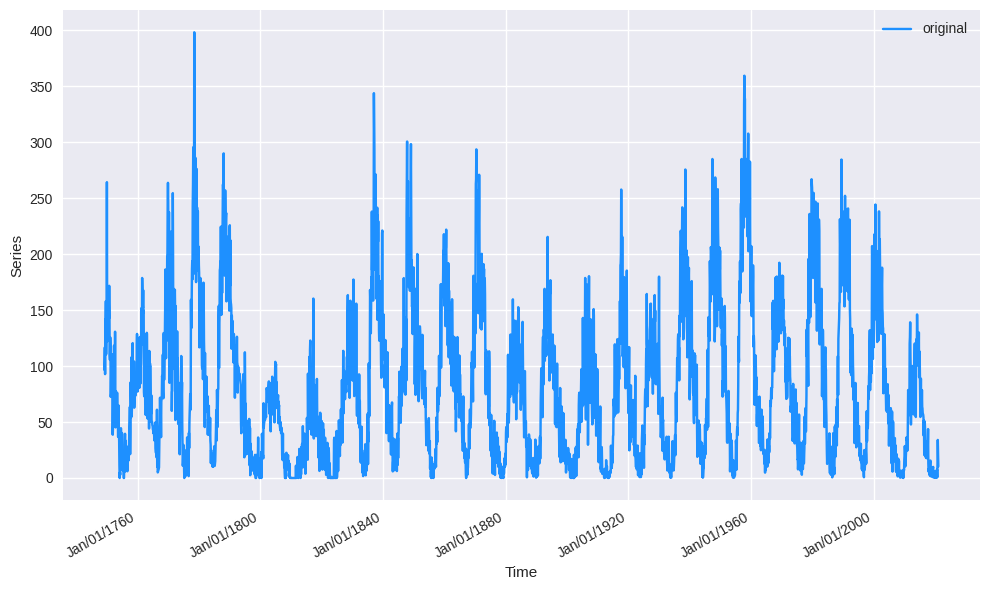

In [ ]:
time_step = []
sunspots = []
for time, value in zip(df['Date'],df['Monthly Mean Total Sunspot Number']):
    time_step.append(time)
    sunspots.append(float(value))

# plot our data
plt.figure(figsize=(10, 6))

plot_series(time_step, sunspots)

<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


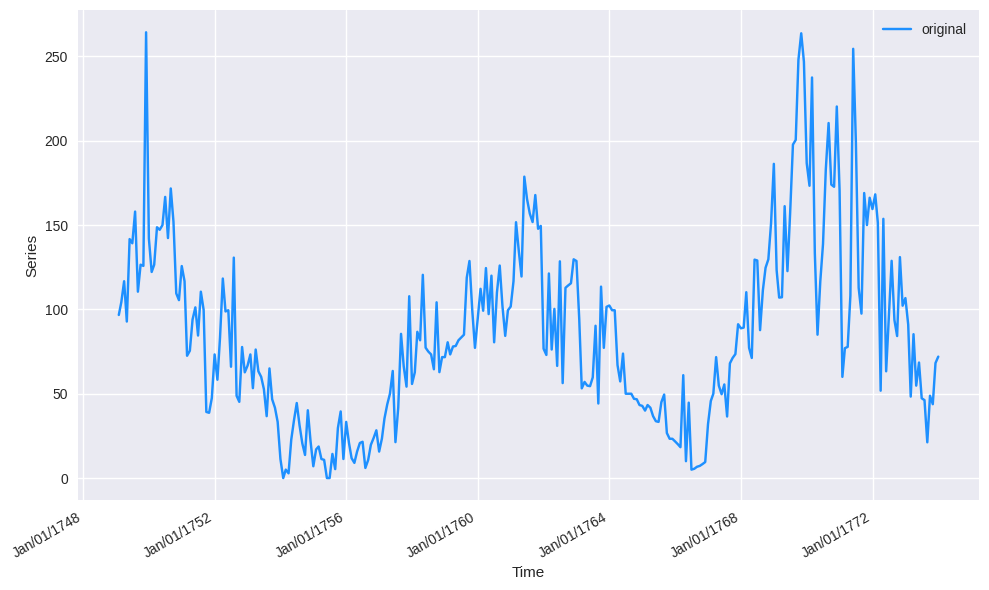

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_step, sunspots, start=0, end=300)

In [ ]:
split_time = int(len(time_step)*0.8)
time_train = time_step[:split_time]
x_train = sunspots[:split_time]
time_valid = time_step[split_time:]
x_valid = sunspots[split_time:]

In [ ]:
split_time = int(len(time_step)*0.8)
train = timeseries[:split_time]
valid = timeseries[split_time:]

In [ ]:
train.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [ ]:
train.index

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1965-11-30', '1965-12-31', '1966-01-31', '1966-02-28',
               '1966-03-31', '1966-04-30', '1966-05-31', '1966-06-30',
               '1966-07-31', '1966-08-31'],
              dtype='datetime64[ns]', name='Date', length=2612, freq=None)

<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


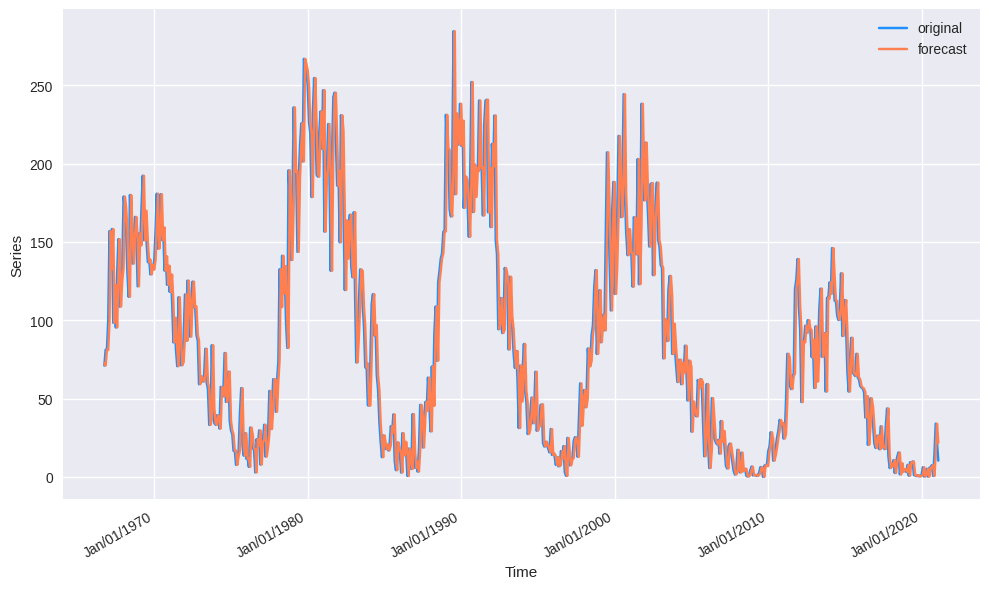

In [ ]:
forecast = sunspots[split_time - 1:-1]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, forecast, col = 'coral', lab = 'forecast')

<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


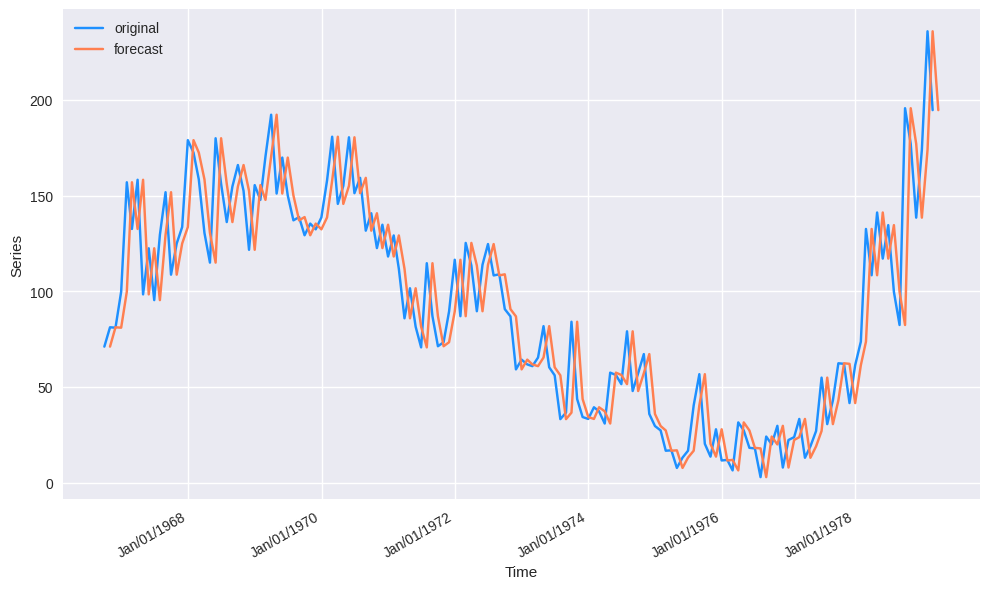

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, forecast, start=1, end=151, col = 'coral', lab = 'forecast')

In [ ]:
print(keras.metrics.mean_absolute_error(x_valid, forecast).numpy())

18.204596


In [ ]:
def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


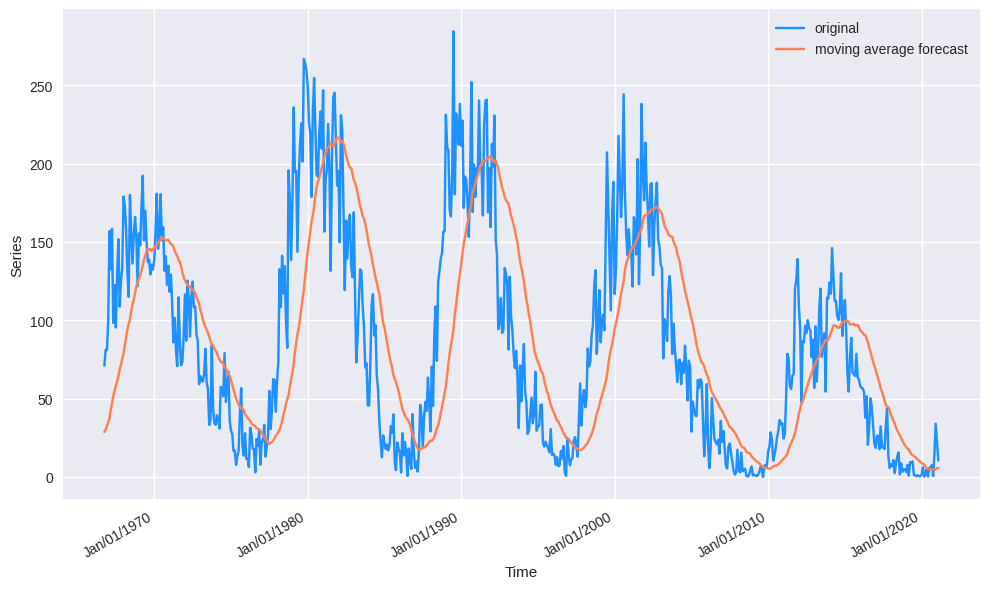

In [ ]:
series = np.array(sunspots)
time = np.array(time_step)
#the windex size is set to  30
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg, col = 'coral', lab = 'moving average forecast')

In [ ]:
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

38.80930567835836


<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


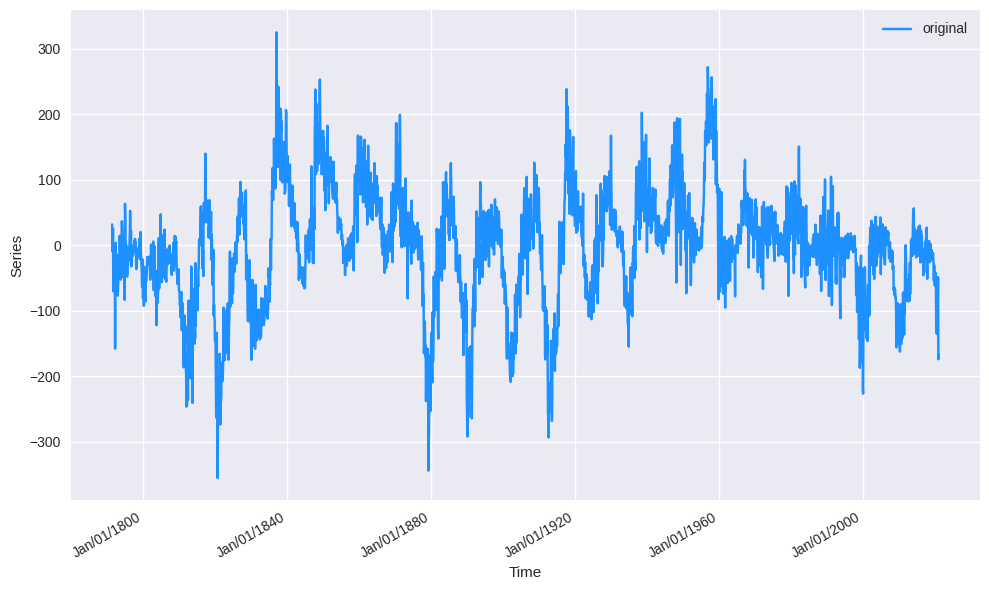

In [ ]:
seasonality = 507
diff_series = (series[seasonality:] - series[:-seasonality])
diff_time = time[seasonality:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


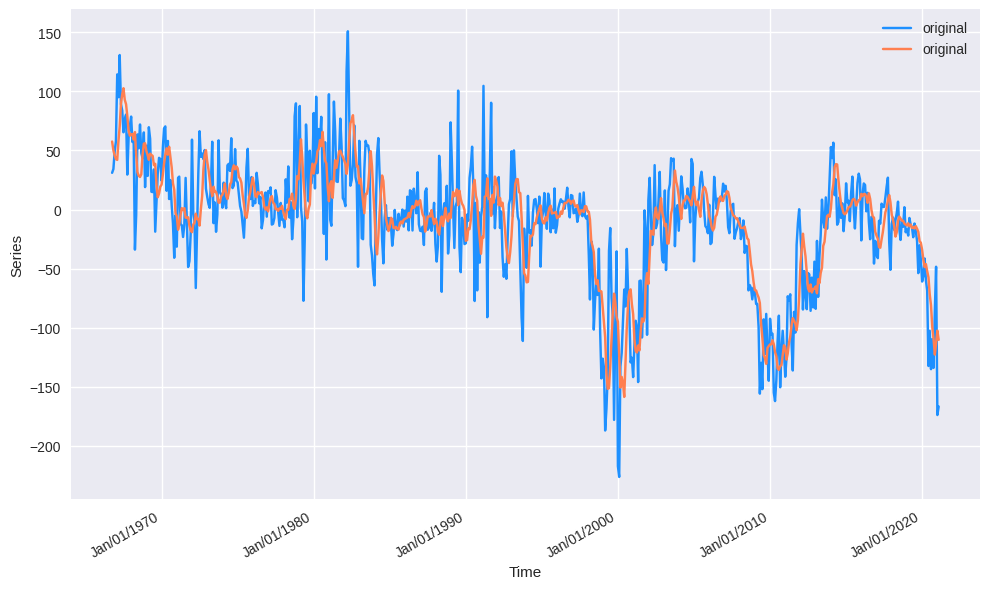

In [ ]:
diff_moving_avg = moving_average_forecast(diff_series, 5)[split_time - seasonality - 5:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - seasonality:])
plot_series(time_valid, diff_moving_avg, col = 'coral')
plt.show()

<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


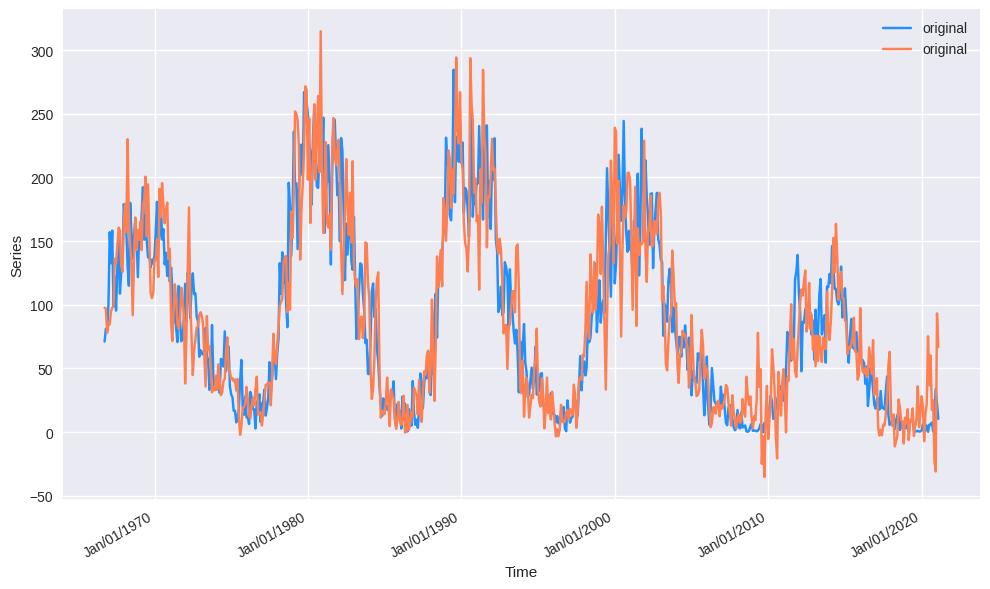

In [ ]:
diff_moving_avg_plus_past = series[split_time - seasonality:-seasonality] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past, col = 'coral')
plt.show()

<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-2-963201841bca>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


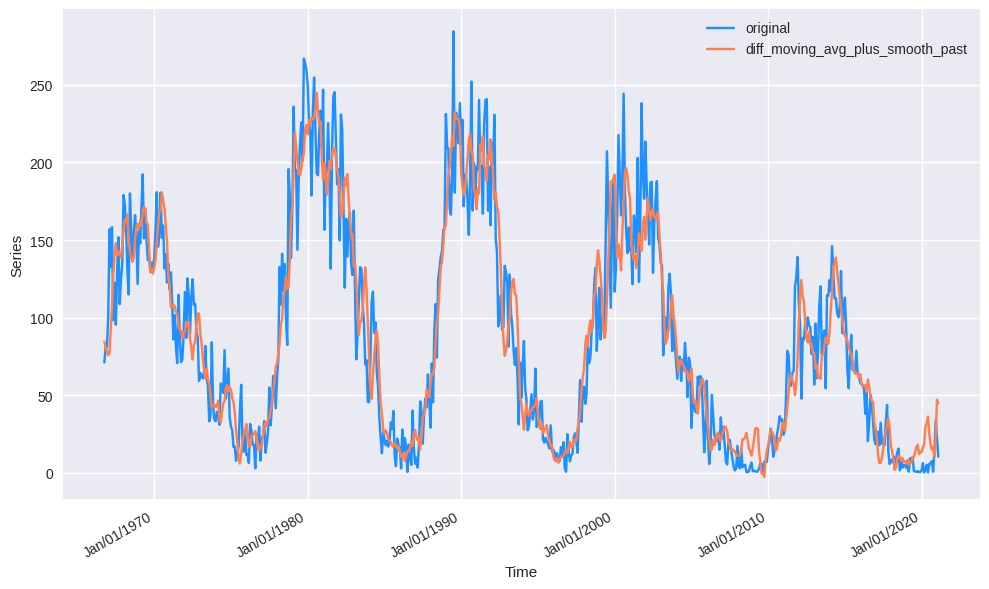

18.602342947526147


In [ ]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - seasonality-5:-seasonality+5], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past, col = 'coral', lab = 'diff_moving_avg_plus_smooth_past')
plt.show()

print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

In [ ]:
def plot_rol(timeseriesdata, size):
    plt.figure(figsize=(15, 7))
    plt.style.use('seaborn')
    # rolling statistics
    rol_mean = timeseriesdata.rolling(window=size).mean()
    rol_std = timeseriesdata.rolling(window=size).std()
    plt.plot(timeseriesdata, color='dodgerblue', label='Original')
    plt.plot(rol_mean, color='red', label='Rolling Mean')
    plt.plot(rol_std, color='green', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    # let the axis off for convenience
    plt.axis('off')
    plt.show()


<ipython-input-25-bd8ce2558987>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


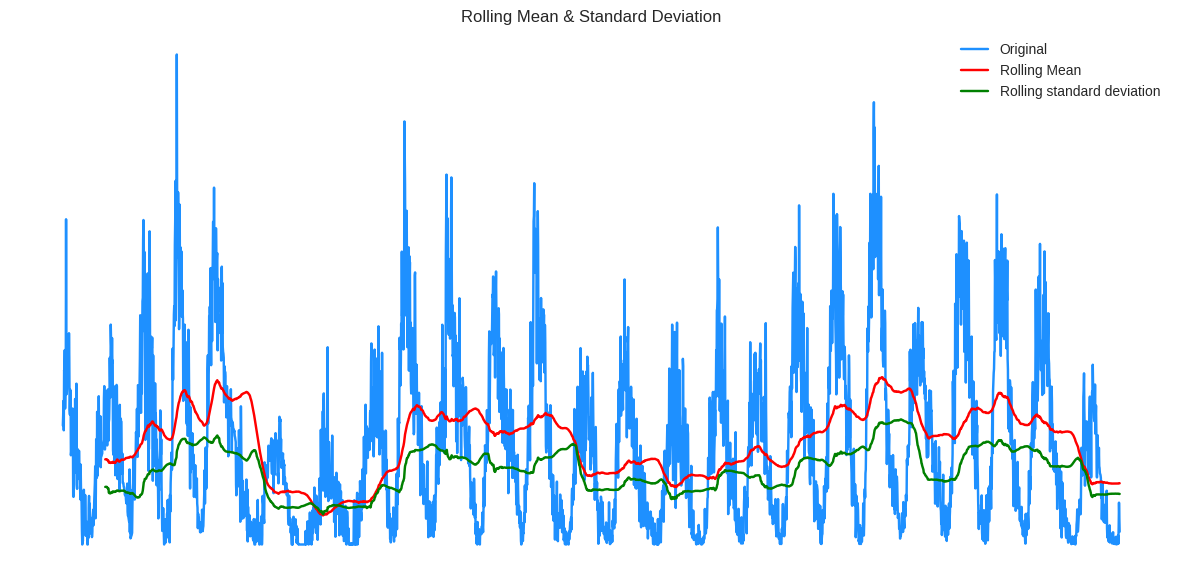

In [ ]:
plot_rol(timeseries, 132)

<ipython-input-25-bd8ce2558987>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


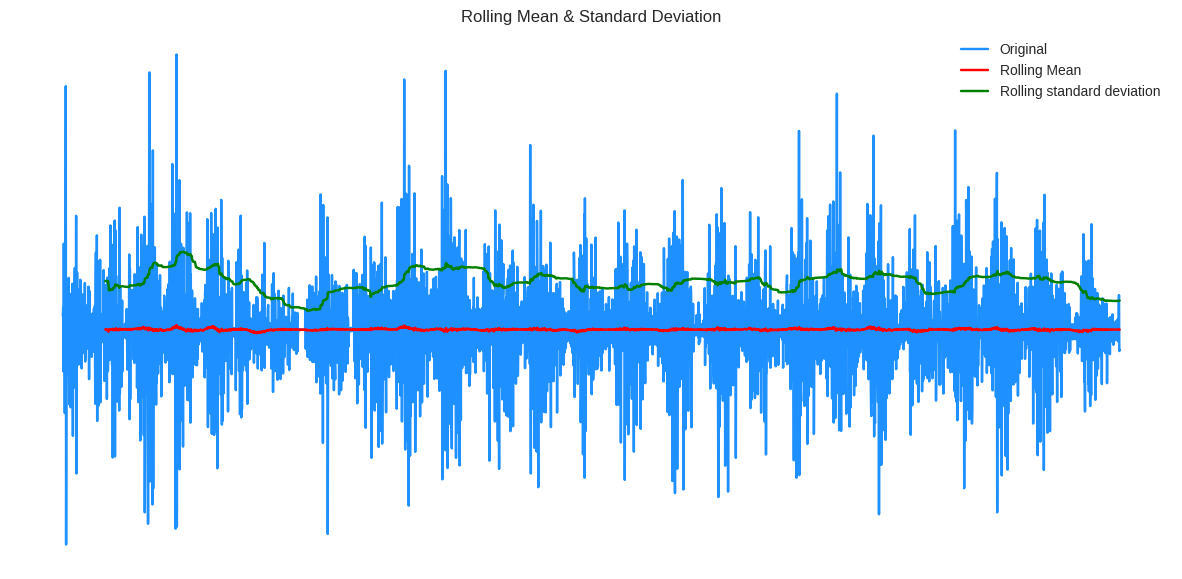

In [ ]:
plot_rol(timeseries.diff(1), 132)

In [ ]:
def teststationarity(ts):
    print('result of dickey-fuller test:')
    dftest = adfuller(ts['Monthly Mean Total Sunspot Number'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput


<function __main__.teststationarity(ts)>

In [ ]:
teststationarity(timeseries)

result of dickey-fuller test:


Test Statistic                -1.049705e+01
p-value                        1.108552e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.236000e+03
Critical Value (1%)           -3.432372e+00
Critical Value (5%)           -2.862434e+00
Critical Value (10%)          -2.567246e+00
dtype: float64

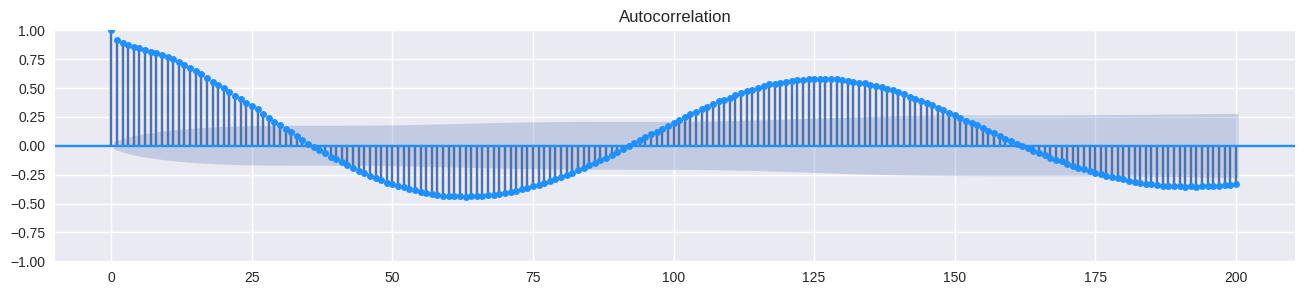

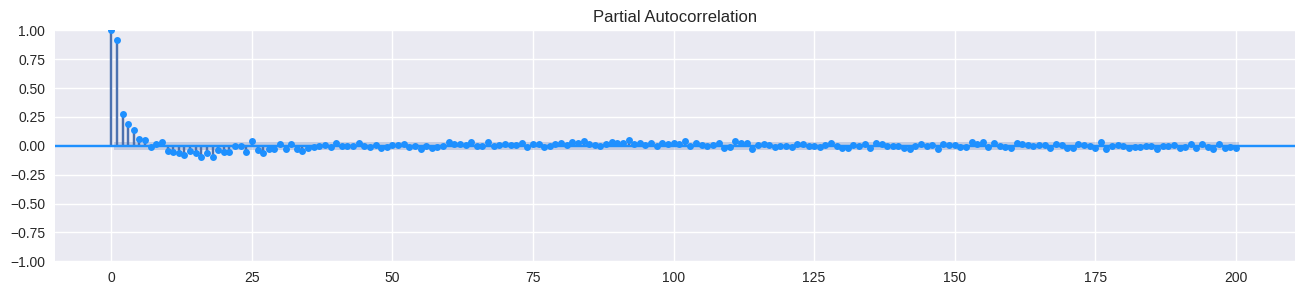

In [ ]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(timeseries,ax=ax, lags = 200, color="dodgerblue");

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(timeseries,ax=ax, lags = 200, color="dodgerblue")
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

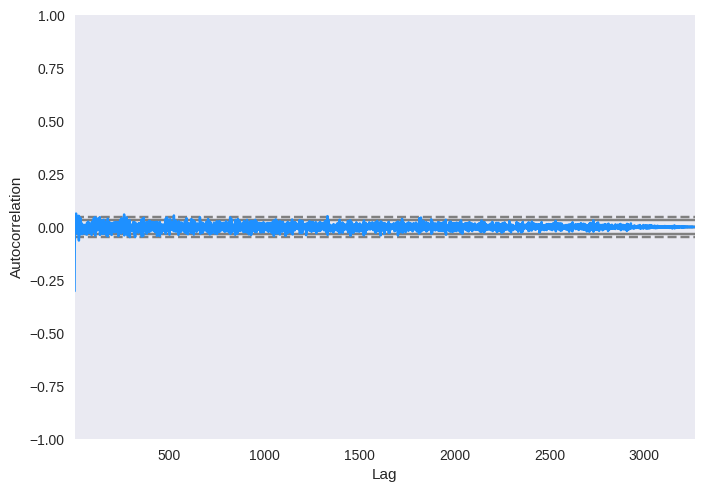

In [ ]:
autocorrelation_plot(timeseries.diff(1)[1:], color='dodgerblue')

In [ ]:
atrain = train.resample('A').sum()
avalid = valid.resample('A').sum()
avalid.head()

,Monthly Mean Total Sunspot Number
Date,
1966-12-31,333.1
1967-12-31,1591.8
1968-12-31,1799.4
1969-12-31,1793.3
1970-12-31,1778.7


In [ ]:
# Initial approximation of parameters
Qs = range(0, 3)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(atrain['Monthly Mean Total Sunspot Number'], order=(param[0], d, param[1]),
                                        seasonal_order=(param[2], D, param[3], 11)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
best_model.summary()

In [ ]:
plt.plot(atrain,color = 'dodgerblue',label = 'trian')
plt.plot(avalid, color = 'r',label = 'valid')
best_model.forecast(len(avalid)).plot(color = 'orange',label = 'forecast')
plt.legend(loc = 'best')
plt.show()